In [147]:
import pandas as pd
import spacy

In [148]:
dataset = pd.read_csv("sample.csv")

In [172]:
dataset

AttributeError: 'LazyConfigValue' object has no attribute 'lower'

   Dragon-Ball-Super-S04E18-DUBBED-720p-HDTV-x264-CRiMSON[rarbg]  1
0   Dragon-Ball-Super-S04E28-DUBBED-720p-HDTV-x264...             1
1   Dragon-Ball-Super-S04E13-DUBBED-720p-HDTV-x264...             1
2   Dragon-Ball-Super-92-Eng-Sub-720p-2CH-AAC-x265...             2
3   Dragon-Ball-Super-S04E19-DUBBED-1080p-HDTV-x26...             1
4   Dragon-Ball-Super-E108-1080p-WEB-DL-H264-DUAL-...             2
5   Dragon-Ball-Super-S04E16-DUBBED-720p-HDTV-x264...             1
6   Dragon-Ball-Super-S05E13-DUBBED-HDTV-x264-CRiM...             1
7   Dragon-Ball-Super-S04E26-DUBBED-720p-HDTV-x264...             1
8   [Funimation-DUB]-Dragon-Ball-Super--83-[1080p]...             2
9   [ACESSE-MEGAFILMESTORRENTS-ORG]-Dragon-Ball-Su...             2
10  WWW-BLUDV-TV -Dragon-Ball-Super-2018--Episodio...             2
11  Dragon-Ball-Super-Complete-Season-2-1080P-BluR...             1
12  Dragon-Ball-Super-Complete-Season-3-1080P-BluR...             1
13  [HorribleSubs] Boruto - Naruto Next Generati

In [149]:

def classificator(string, dataset):

    nlp = spacy.load('en_core_web_sm')
    doc1 = nlp(string)
    
    similarity_ = []
    values = []
    index_  = []
    
    i = 1
    for index, row in dataset.iterrows():
        row_nlp = nlp(row.values[0])
        similarity = row_nlp.similarity(doc1)
        #print ("{} Expected:{} - Predicted:{}".format(row.values[0][:16], row.values[1], similarity))
        similarity_.append(similarity)
        values.append(row.values[1])
        index_.append(i)
        i = i + 1
        
    return index_, values, similarity_

In [180]:
index, expected, predicted = classificator(u"720p-HDTV", dataset)

In [181]:
predicted_df = pd.DataFrame(data=predicted, columns=["predicted"])
expected_df = pd.DataFrame(data=expected, columns=["expected"])

In [182]:
total = pd.concat([expected_df,predicted_df],axis=1)

In [183]:
total_1 = total[total["expected"] == 1]
total_2 = total[total["expected"] == 2]
total_3 = total[total["expected"] == 3]

In [184]:
total_1.mean()

expected     1.00000
predicted    0.52958
dtype: float64

In [185]:
total_2.mean()

expected     2.000000
predicted    0.483776
dtype: float64

In [186]:
total_3.mean()

expected     3.000000
predicted    0.572299
dtype: float64

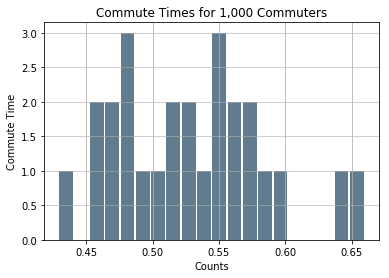

In [187]:
# Generate data on commute times.
size, scale = 1000, 10

commutes = total_1["predicted"]

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

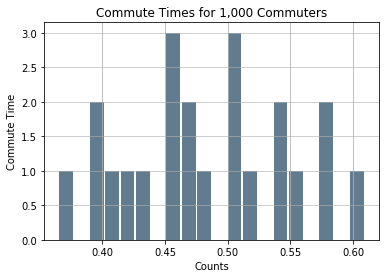

In [188]:
# Generate data on commute times.
size, scale = 1000, 10

commutes = total_2["predicted"]

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

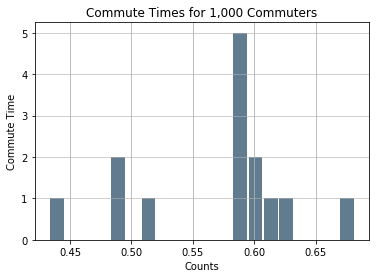

In [189]:
# Generate data on commute times.
size, scale = 1000, 10

commutes = total_3["predicted"]

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

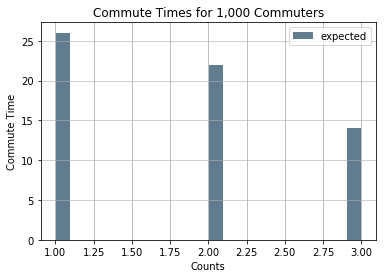

In [190]:
# Generate data on commute times.
size, scale = 1000, 10

commutes = expected_df

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)